# COLUMNS DESCRIPTION
### CARAT
Carat refers to the diamond’s weight, not its size. A carat weighs 0.2 grams. 

### CUT
It refers to how it’s sculpted into proportions which allows for the best play of light. 
'Ideal'>'Premium'>'Very Good'>'Good'>'Fair'

### COLOR
The color grade is based on the diamond’s lack of color. The best grade is D which is perfect colorless but one has the option until color Z

### CLARITY
Clarity refers to the internal purity of the diamond.
#### IF (Internally Flawless)
Most inclusions are microscopic that they tend to be invisible under 10x magnification by a skilled grader

#### VVS 
Inclusions so slight they are difficult for a skilled grader to see under 10x magnification

Grade 1: One inclusion
Grade 2: More than one inclusions

#### VS 
Inclusions are observed with effort under 10x magnification, but can be characterized as minor

Grade 1: One inclusion
Grade 2: More than one inclusions

#### SI  
Inclusions are noticeable under 10x magnification

Grade 1: One inclusion
Grade 2: More than one inclusions

#### I(Included) 
Inclusions are obvious under 10x magnification which may affect transparency and brilliance

Grade 1: One inclusion
Grade 2: More than one inclusions that affects brilliance
Grado 3: More than one inclusions that affects brilliance and makes the diamond more fragile 

### DEPTH
Diamond depth is the height of a diamond from its table to its culet. In this case, in % --> (z / mean(x, y) = 2 * z / (x + y)

### TABLE
Table refers to the large flat facet on the top of the stone

# IMPORTS AND FIRST APROACH

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
diamonds_df = pd.read_csv('data/diamonds_train.csv')
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [8]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [3]:
diamonds_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

## Frequency distribution of categories

In [116]:
# diamonds_df[['cut', 'color', 'clarity']].value_counts().to_frame() easier, if we go one by one
print(diamonds_df['cut'].value_counts())
print(diamonds_df['color'].value_counts())
print(diamonds_df['clarity'].value_counts())

Ideal        16218
Premium      10251
Very Good     9095
Good          3659
Fair          1216
Name: cut, dtype: int64
G    8449
E    7325
F    7173
H    6272
D    5049
I    4031
J    2140
Name: color, dtype: int64
SI1     9747
VS2     9246
SI2     6920
VS1     6065
VVS2    3799
VVS1    2774
IF      1327
I1       561
Name: clarity, dtype: int64


In [114]:
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


There are values at x, y, z that equals to 0, so we gonna drop them. It has no sense, here.

In [4]:
diamonds_df = diamonds_df[(diamonds_df['x'] != 0) & (diamonds_df['y'] != 0) & (diamonds_df['z'] != 0)]
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000,40439.000000
mean,0.797425,61.753013,57.445543,3926.535448,5.729616,5.732897,3.538553
std,0.475257,1.431306,2.233055,3990.024501,1.122384,1.145002,0.693639
min,0.200000,43.000000,43.000000,326.000000,3.770000,3.720000,1.070000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2396.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5329.500000,6.540000,6.540000,4.040000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


### Frequency distribution of categorical values, plot

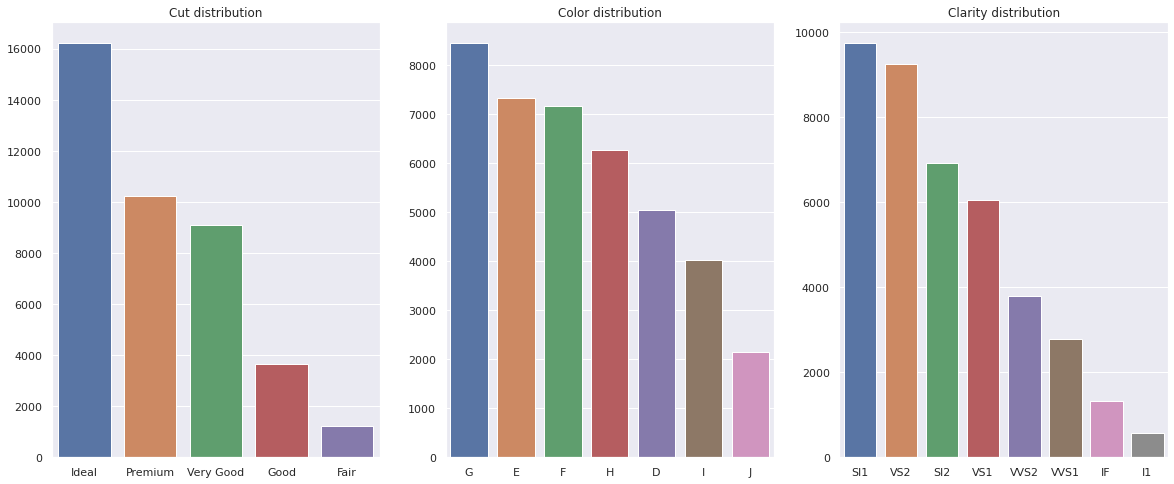

In [117]:
cut_count = diamonds_df['cut'].value_counts()
color_count = diamonds_df['color'].value_counts()
clarity_count = diamonds_df['clarity'].value_counts()


fig, ax = plt.subplots(1,3, figsize=(20, 8))
sns.barplot(ax=ax[0], x=cut_count.index, y=cut_count.values)
ax[0].set_title('Cut distribution')
sns.barplot(ax=ax[1], x=color_count.index, y=color_count.values)
ax[1].set_title('Color distribution')
sns.barplot(ax=ax[2], x=clarity_count.index, y=clarity_count.values)
ax[2].set_title('Clarity distribution');


We can see that in our dataset there are more diamonds with an ideal cut.
When we talk about colour feature, 'G' is the bigger one in our dataset.
In our clarity graph we can see that our dataset have not a good amount of perfects clarity (Il or If), the majority of the diamonds are situated at the worst part of the clarity scale. 

## To see the relation between a categorical feature and a continuous feature we gonna use a boxplot

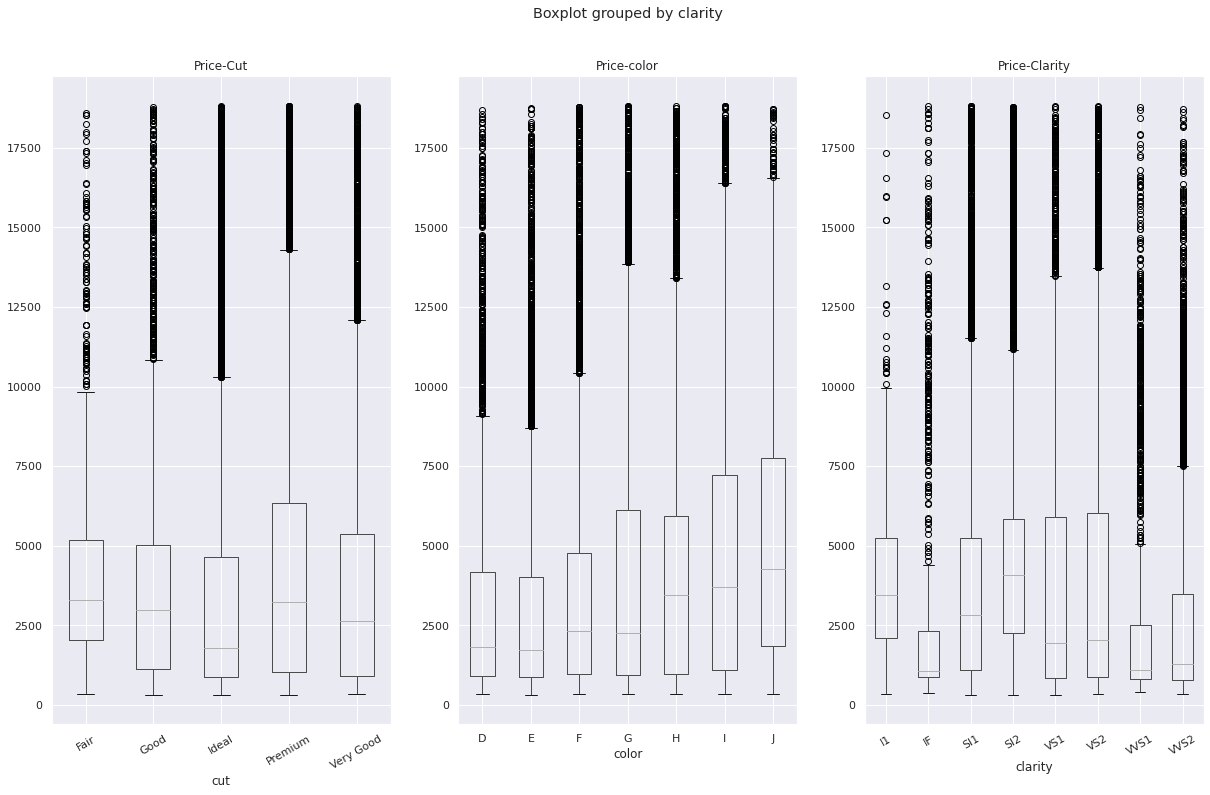

In [51]:

fig, ax = plt.subplots(1,3, figsize=(20, 12))
fig.suptitle('Boxplot categorical values and prices')
diamonds_df.boxplot('price','cut',rot = 30, ax=ax[0])
ax[0].set_title('Price-Cut')
diamonds_df.boxplot('price','color', ax=ax[1])
ax[1].set_title('Price-color')
diamonds_df.boxplot('price','clarity',rot = 30, ax=ax[2])
ax[2].set_title('Price-Clarity');

Here we can see that, doesn't matter the category, the diamonds tend to cost more than the median value, and there are not outliers at the bottom. We can say that diamonds in general, are overpriced (?)

## NUMERICAL VS NUMERICAL

## Heatmap

<AxesSubplot:>

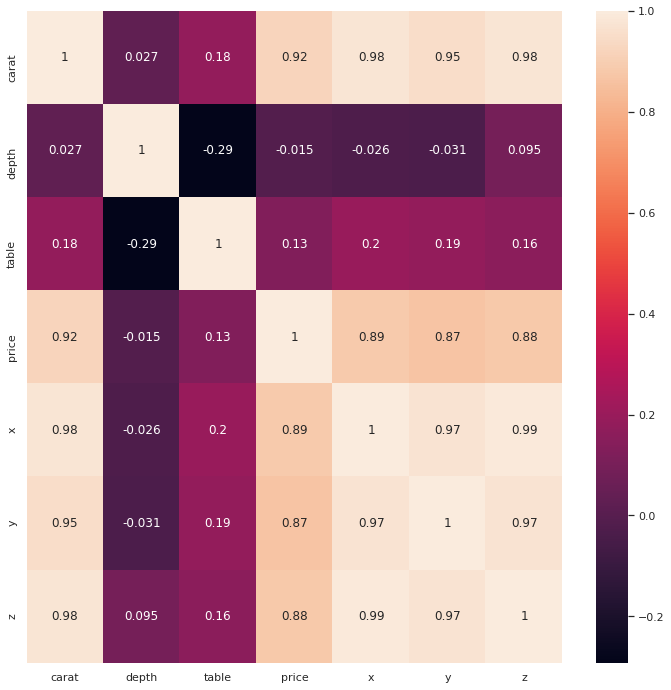

In [118]:
plt.figure(figsize=(12,12))
corr = diamonds_df.corr()
sns.heatmap(data=corr, annot=True, cbar=True)

The most correlated aspects in our diamonds dataset are carat, price and the three dimensions (x,y,z).
Carat and price are highly correlated because Carat determinate the price, with other aspects, but affects a lot. 
In the case of diamensions, it's clear that they can affect the carat. We can logically think that bigger dimensions means more weight and more weight means higher price.

One interesting thing here is how depth affects the price. The correlation is negative, this happens because the depth affects in how diamonds reflects the sparkle and usually, more depth or not enough deepness means worse refflection, so the price decrease.

Something similar happens to table. Table and depth are inversely correlated. When the table is wider, the depth is lower and, obviously, affect the price.

## PRICE AND 4C RELATION
### CARAT-PRICE

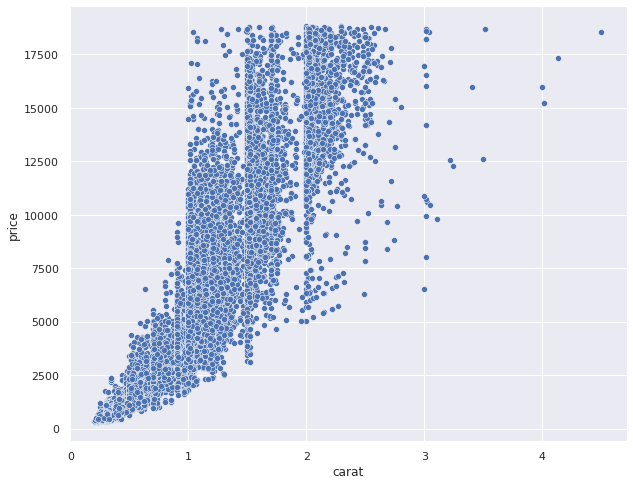

In [119]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data='diamonds_df', x=diamonds_df['carat'], y=diamonds_df['price']);

As we can see here, the price goes up as the diamond's carat increase.

### Cut-Color-Price

In [5]:
#fig, ax = plt.subplots(2,2, figsize=(20, 8))
#sns.pointplot(ax=ax[0], x=diamonds_df['cut'],y=diamonds_df['price'], hue=diamonds_df['color'])
#sns.pointplot(ax=ax[1], x='cut',y='price', hue='clarity')
#sns.pointplot(ax=ax[2], x='color',y='price', hue='clarity')



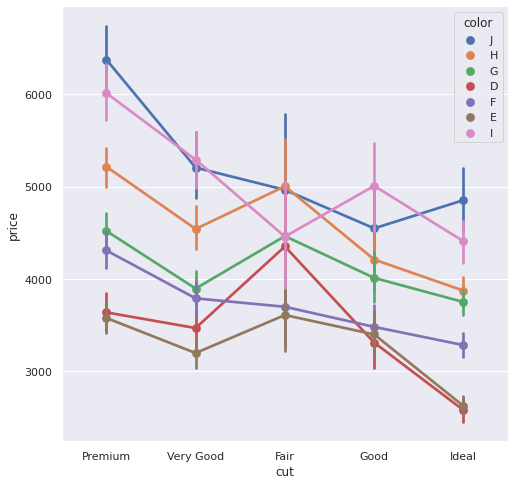

In [137]:
plt.figure(figsize=(8,8))
sns.pointplot(x="cut",y="price", hue="color", data=diamonds_df);

The insights from this visualization are not as expected. We know that Ideal and Premium cut are the best ones, but why Ideal prices are lower than Premium ones in all colors. Probably, because the other features in Premium are better than the ones we have in Ideal cut


### Cut-Clarity-Price

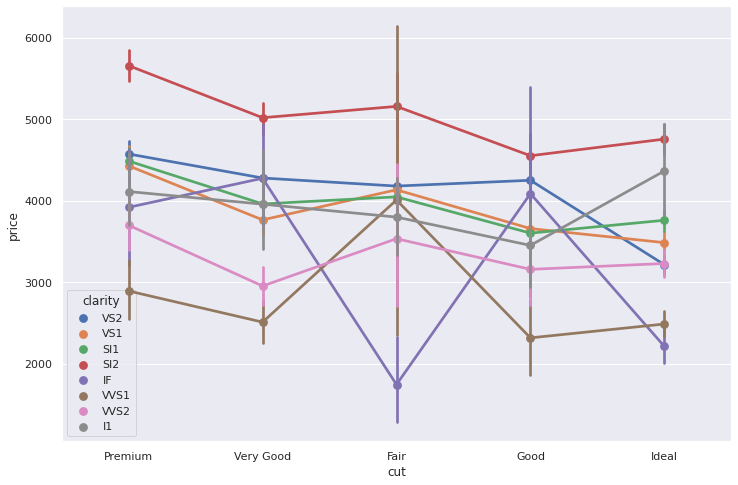

In [142]:
plt.figure(figsize=(12,8))
sns.pointplot(data=diamonds_df, x='cut',y='price', hue='clarity');

IF at fair cut has the lowest price, which can be strange 'cause IF clarity is the best one.

In [8]:
diamonds_df[(diamonds_df['clarity'] == 'IF') & (diamonds_df['cut'] == 'Fair')]

,carat,cut,color,clarity,depth,table,price,x,y,z
1773,0.71,Fair,F,IF,58.7,62.0,3205,5.87,5.81,3.43
5077,0.52,Fair,G,IF,65.5,55.0,1849,4.98,5.06,3.29
28126,0.39,Fair,G,IF,57.1,61.0,1127,4.83,4.88,2.77
31530,0.47,Fair,D,IF,60.6,60.0,2211,5.09,4.98,3.05
33447,0.37,Fair,F,IF,52.3,61.0,1166,4.96,4.91,2.58
34928,0.30,Fair,D,IF,60.5,57.0,1208,4.47,4.35,2.67
38338,0.37,Fair,D,IF,61.2,57.0,1440,4.68,4.73,2.88


As we can see the low price in this case can be explained by the rest of the caracteristics. Fair cut at IF clarity has very low weight values

### Clarity-Color-Price

<AxesSubplot:xlabel='clarity', ylabel='price'>

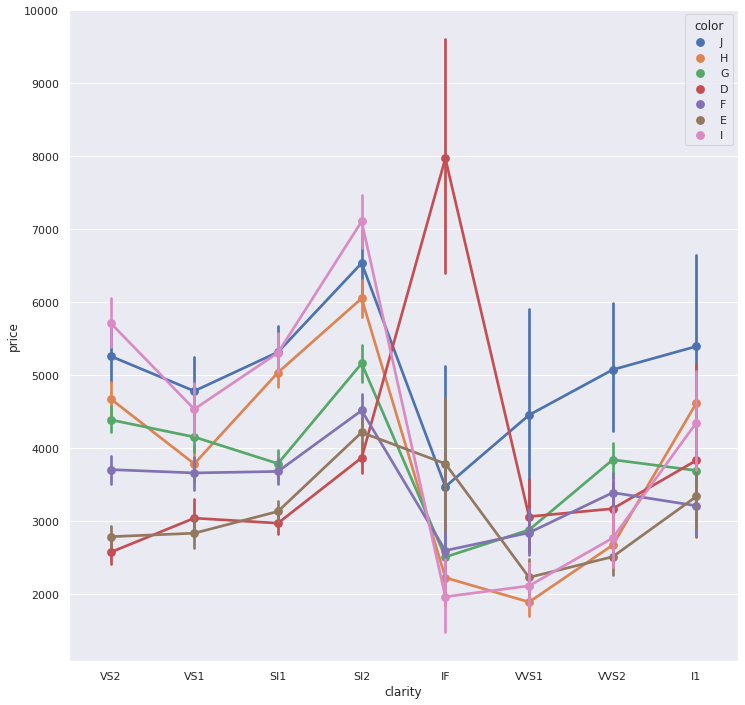

In [155]:
plt.figure(figsize=(12,12))
sns.pointplot(data=diamonds_df, x='clarity',y='price', hue='color')

Here the D color has the maximum mean price at perfect clarity which is something we can expect. The more strange thing we can see, is the mean prices for all clarity at E color. It's pretty low.

In [11]:
diamonds_df[diamonds_df['color'] == 'E'].describe()

,carat,depth,table,price,x,y,z
count,7325.000000,7325.000000,7325.000000,7325.000000,7325.000000,7325.000000,7325.000000
mean,0.658835,61.659836,57.494567,3088.342526,5.413894,5.418651,3.338709
std,0.368947,1.417519,2.235462,3354.545963,0.963119,0.958256,0.593599
min,0.200000,53.300000,44.000000,326.000000,3.790000,3.750000,2.060000
25%,0.360000,60.900000,56.000000,882.000000,4.570000,4.580000,2.810000
50%,0.530000,61.800000,57.000000,1735.000000,5.230000,5.240000,3.220000
75%,0.910000,62.500000,59.000000,4026.000000,6.190000,6.190000,3.840000
max,3.050000,79.000000,73.000000,18731.000000,9.260000,9.250000,5.660000


The average carat looks good, but depth and table values are pretty similar. Is possible that the diamonds at color E has a shallow aspect which affects the refflect of sparkle and the price.